In [ ]:
!git clone https://github.com/ahmedramadan96/EALPR.git

Cloning into 'EALPR'...
remote: Enumerating objects: 18740, done.
remote: Counting objects: 100% (12906/12906), done.
remote: Compressing objects: 100% (12903/12903), done.
remote: Total 18740 (delta 12), reused 12892 (delta 3), pack-reused 5834
Receiving objects: 100% (18740/18740), 273.19 MiB | 16.90 MiB/s, done.
Resolving deltas: 100% (32/32), done.
Updating files: 100% (18735/18735), done.


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# **Installation**

In [ ]:
! apt install tesseract-ocr
! apt install libtesseract-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 22 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 3s (1,728 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 128276 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-eng_1%3

In [ ]:
!pip install pydotplus
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!git clone https://github.com/tesseract-ocr/tessdata

Cloning into 'tessdata'...
remote: Enumerating objects: 769, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 769 (delta 0), reused 1 (delta 0), pack-reused 768
Receiving objects: 100% (769/769), 3.17 GiB | 18.42 MiB/s, done.
Resolving deltas: 100% (178/178), done.
Updating files: 100% (172/172), done.


In [ ]:
import os
os.environ['TESSDATA_PREFIX'] = '/content/tessdata'   #environment variable

In [ ]:
!pip install kaggle


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!cp "/content/drive/MyDrive/Kaggle/kaggle.json" ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d nourhanabosaeed/plates-classification -p "/content/plates"

 98% 62.0M/63.5M [00:04<00:00, 18.7MB/s]
100% 63.5M/63.5M [00:04<00:00, 14.0MB/s]


In [ ]:
!unzip /content/plates/plates-classification.zip -d /content/plates/plates-classification

Archive:  /content/plates/plates-classification.zip
  inflating: /content/plates/plates-classification/plate colors/blue/0001_license_plate_1.png  
  inflating: /content/plates/plates-classification/plate colors/blue/0002_license_plate_1.png  
  inflating: /content/plates/plates-classification/plate colors/blue/0003_license_plate_1.png  
  inflating: /content/plates/plates-classification/plate colors/blue/0005_license_plate_1.png  
  inflating: /content/plates/plates-classification/plate colors/blue/0006_license_plate_1.png  
  inflating: /content/plates/plates-classification/plate colors/blue/0010_license_plate_1.png  
  inflating: /content/plates/plates-classification/plate colors/blue/0011_license_plate_1.png  
  inflating: /content/plates/plates-classification/plate colors/blue/0013_license_plate_1.png  
  inflating: /content/plates/plates-classification/plate colors/blue/0014_license_plate_1.png  
  inflating: /content/plates/plates-classification/plate colors/blue/0015_license_pl

# **Crop the top part of the plate number**

10 20 92 33


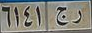

Top part color: (116.94565217391305, 70.32173913043478, 7.9913043478260875)


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import pytesseract
# Load the image
img = cv2.imread('/content/EALPR/EALPR- Plates dataset/1939_license_plate_1.png')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply a threshold to segment the plate
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Find the contours of the plate
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort the contours by area and select the largest one
contours = sorted(contours, key=cv2.contourArea, reverse=True)
largest_contour = contours[0]

# Find the bounding box of the largest contour
x, y, w, h = cv2.boundingRect(largest_contour)
print(x,y,w,h)
# Crop the image to the bounding box of the plate
bottom = img[y:y+h, x:x+w]
plate= img[int(y/2):y,x:x+w]
cv2_imshow(bottom)
cv2_imshow(plate)
# Convert the plate to grayscale
gray_plate = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)

# Apply a threshold to segment the characters of the plate
_, thresh_plate = cv2.threshold(gray_plate, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Find the contours of the characters
char_contours, _ = cv2.findContours(thresh_plate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort the contours from left to right
char_contours = sorted(char_contours, key=lambda c: cv2.boundingRect(c)[0])

# Concatenate the characters into a single string
plate_text = ""
for contour in char_contours:
    x, y, w, h = cv2.boundingRect(contour)
    char_img = thresh_plate[y:y+h, x:x+w]
    char_text = pytesseract.image_to_string(char_img, config="--psm 10")
    plate_text += char_text.strip()

# Create a mask for the top part of the plate with the same size as the input image
top_mask = np.zeros_like(plate[:,:,0])
top_mask[0:y+h//2, :] = 255

# Apply the mask to the plate image
masked_plate = cv2.bitwise_and(plate, plate, mask=top_mask)

# Compute the mean color of the top part of the plate
mean_color = cv2.mean(masked_plate, mask=top_mask)[0:3]

# Crop the image to the bounding box of the top part of the plate
cropped_plate = plate[0:y+h//2, :]

# Create a mask for the top part of the cropped image
crop_mask = np.zeros(cropped_plate.shape[:2], dtype=np.uint8)
crop_mask[0:h//2, :] = 255

# Apply the mask to the cropped image
masked_cropped_plate = cv2.bitwise_and(cropped_plate, cropped_plate, mask=crop_mask)

# Display the color information and the cropped images
print(f"Top part color: {mean_color}")
cv2_imshow(masked_cropped_plate)

In [ ]:
def predict_without_segmentation(path):
  # Load the image
  img = cv2.imread(path)

  # Convert to grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # Apply a threshold to segment the plate
  _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

  # Find the contours of the plate
  contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Sort the contours by area and select the largest one
  contours = sorted(contours, key=cv2.contourArea, reverse=True)
  if len(contours)==0:
    return (0,0,0)

  largest_contour = contours[0]

  # Find the bounding box of the largest contour
  x, y, w, h = cv2.boundingRect(largest_contour)
  #print(x,y,w,h)
  # Crop the image to the bounding box of the plate
  bottom = img[y:y+h, x:x+w]
  plate= img[int(y/2):y,x:x+w]

  if plate is None or plate.size == 0:
    plate = bottom[0:int(h/2), x:x+w]
  #cv2_imshow(bottom)
  #cv2_imshow(plate)
  # Convert the plate to grayscale
  gray_plate = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)

  # Apply a threshold to segment the characters of the plate
  _, thresh_plate = cv2.threshold(gray_plate, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

  # Find the contours of the characters
  char_contours, _ = cv2.findContours(thresh_plate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Sort the contours from left to right
  char_contours = sorted(char_contours, key=lambda c: cv2.boundingRect(c)[0])

  # Concatenate the characters into a single string
  plate_text = ""
  for contour in char_contours:
      x, y, w, h = cv2.boundingRect(contour)
      char_img = thresh_plate[y:y+h, x:x+w]
      char_text = pytesseract.image_to_string(char_img, config="--psm 10")
      plate_text += char_text.strip()

  # Create a mask for the top part of the plate with the same size as the input image
  top_mask = np.zeros_like(plate[:,:,0])
  top_mask[0:y+h//2, :] = 255

  # Apply the mask to the plate image
  masked_plate = cv2.bitwise_and(plate, plate, mask=top_mask)

  # Compute the mean color of the top part of the plate
  mean_color = cv2.mean(masked_plate, mask=top_mask)[0:3]

  return mean_color

In [ ]:
blue=((255,0,0),(255,255,100))
blue2=((100,0,0),(200,200,150))

In [ ]:
def in_range(color,_range):
    for i in range(3):
        if color[i] < _range[0][i] or color[i] > _range[1][i]:
            return False
    return True


In [ ]:
!rm /content/plates/plates-classification/plate_colors/blue/1088_license_plate_1.png #corrupted

In [ ]:
trb=0
for path in os.listdir('/content/plates/plates-classification/plate colors/blue')[:100]:
  image='/content/plates/plates-classification/plate colors/blue/'+str(path)
  color=predict_without_segmentation(image)
  if in_range(color,blue2) or in_range(color,blue):
    trb+=1
print(trb)

45


In [ ]:
def predict_witout_transformation(path):
  # Load the image
  img = cv2.imread(path)

  # Convert to grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # Apply a threshold to segment the plate
  _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

  # Find the contours of the plate
  contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Sort the contours by area and select the largest one
  contours = sorted(contours, key=cv2.contourArea, reverse=True)
  if len(contours)==0:
    return (0,0,0)
  largest_contour = contours[0]

  # Find the bounding box of the largest contour
  x, y, w, h = cv2.boundingRect(largest_contour)

  # Crop the image to the bounding box of the plate
  bottom = img[y:y+h, x:x+w]
  plate = img[int(y/2):y,x:x+w]

  if plate is None or plate.size == 0:
    plate = bottom[0:int(h/2), x:x+w]
    #return (0,0,0)
  # Convert the plate to grayscale
  gray_plate = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)

  # Apply a threshold to segment the characters of the plate
  _, thresh_plate = cv2.threshold(gray_plate, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

  # Find the contours of the characters
  char_contours, _ = cv2.findContours(thresh_plate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Sort the contours from left to right
  char_contours = sorted(char_contours, key=lambda c: cv2.boundingRect(c)[0])

  # Concatenate the characters into a single string
  plate_text = ""
  for contour in char_contours:
      x, y, w, h = cv2.boundingRect(contour)
      char_img = thresh_plate[y:y+h, x:x+w]
      char_text = pytesseract.image_to_string(char_img, config="--psm 10")
      plate_text += char_text.strip()

  # Create a mask for the top part of the plate with the same size as the input image
  top_mask = np.zeros_like(plate[:,:,0])
  top_mask[0:y+h//2, :] = 255

  # Apply the mask to the plate image
  masked_plate = cv2.bitwise_and(plate, plate, mask=top_mask)

  # Compute the mean color of the top part of the plate
  mean_color = cv2.mean(masked_plate, mask=top_mask)[0:3]
  return mean_color

In [ ]:
predict_witout_transformation('/content/EALPR/EALPR- Plates dataset/0102_license_plate_1.png')

(189.94476190476192, 152.96761904761905, 58.94095238095238)

In [ ]:
trb=0
for path in os.listdir('/content/plates/plates-classification/plate colors/blue')[:100]:
  image='/content/plates/plates-classification/plate colors/blue/'+str(path)
  color=predict_witout_transformation(image)
  if in_range(color,blue2) or in_range(color,blue):
    trb+=1
print(trb)

45


# **Apply transformations to prevent the sloping images**

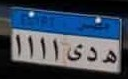

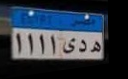

In [ ]:

# Load the image
img = cv2.imread('/content/EALPR/EALPR- Plates dataset/0052_license_plate_1.png')

# Define the source points for the perspective transform
src = np.array([[0, 0], [img.shape[1], 0], [img.shape[1], img.shape[0]], [0, img.shape[0]]], np.float32)

# Define the destination points for the perspective transform
dst = np.array([[0, 0], [img.shape[1]*.84, 0], [img.shape[1]*0.85, img.shape[0]*.8], [0, img.shape[0]]], np.float32)

# Compute the perspective transform matrix
M = cv2.getPerspectiveTransform(src, dst)

# Apply the perspective transform to the image
warped = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))

# Display the original and warped images
cv2_imshow(img)
cv2_imshow(warped)


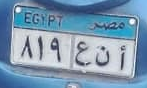

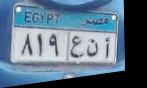

In [ ]:
# Load the image
img = cv2.imread('/content/EALPR/EALPR- Plates dataset/0011_license_plate_1.png')

# Define the source points for the perspective transform
src = np.array([[0, 0], [img.shape[1], 0], [img.shape[1], img.shape[0]], [0, img.shape[0]]], np.float32)

# Define the destination points for the perspective transform
dst = np.array([[0, 0], [img.shape[1]*.84, 0], [img.shape[1]*0.85, img.shape[0]*.8], [0, img.shape[0]]], np.float32)

# Compute the perspective transform matrix
M = cv2.getPerspectiveTransform(src, dst)

# Apply the perspective transform to the image
warped = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))

# Display the original and warped images
cv2_imshow(img)
cv2_imshow(warped)


In [ ]:
def predict_with_transformation(path):
  # Load the image
  img = cv2.imread(path)

  src = np.array([[0, 0], [img.shape[1], 0], [img.shape[1], img.shape[0]], [0, img.shape[0]]], np.float32)

  # Define the destination points for the perspective transform
  dst = np.array([[0, 0], [img.shape[1]*.84, 0], [img.shape[1]*0.85, img.shape[0]*.8], [0, img.shape[0]]], np.float32)

  # Compute the perspective transform matrix
  M = cv2.getPerspectiveTransform(src, dst)

  # Apply the perspective transform to the image
  warped = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))

  # Convert to grayscale
  gray = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)

  # Apply a threshold to segment the plate
  _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

  # Find the contours of the plate
  contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Sort the contours by area and select the largest one
  contours = sorted(contours, key=cv2.contourArea, reverse=True)
  if len(contours)==0:
    return (0,0,0)
  largest_contour = contours[0]

  # Find the bounding box of the largest contour
  x, y, w, h = cv2.boundingRect(largest_contour)

  # Crop the image to the bounding box of the plate
  bottom = img[y:y+h, x:x+w]
  plate = img[int(y/2):y,x:x+w]

  if plate is None or plate.size == 0:
    plate = bottom[0:int(h/2), x:x+w]

  if plate is None or plate.size == 0:
    return (0,0,0)
  # Convert the plate to grayscale
  gray_plate = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)

  # Apply a threshold to segment the characters of the plate
  _, thresh_plate = cv2.threshold(gray_plate, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

  # Find the contours of the characters
  char_contours, _ = cv2.findContours(thresh_plate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Sort the contours from left to right
  char_contours = sorted(char_contours, key=lambda c: cv2.boundingRect(c)[0])

  # Concatenate the characters into a single string
  plate_text = ""
  for contour in char_contours:
      x, y, w, h = cv2.boundingRect(contour)
      char_img = thresh_plate[y:y+h, x:x+w]
      char_text = pytesseract.image_to_string(char_img, config="--psm 10")
      plate_text += char_text.strip()

  # Create a mask for the top part of the plate with the same size as the input image
  top_mask = np.zeros_like(plate[:,:,0])
  top_mask[0:y+h//2, :] = 255

  # Apply the mask to the plate image
  masked_plate = cv2.bitwise_and(plate, plate, mask=top_mask)

  # Compute the mean color of the top part of the plate
  mean_color = cv2.mean(masked_plate, mask=top_mask)[0:3]

  return mean_color
  #print(f"Top part color: {mean_color}")

  # Display the masked and cropped images
  #cv2_imshow(masked_plate)
  #cv2_imshow(masked_cropped_plate)
  # Define the RGB color
  #color = mean_color

  # Create a small image of size (50, 50) with the desired color
  #color_image = np.zeros((50, 50, 3), np.uint8)
  #color_image[:] = color

  # Display the image with the color
  #cv2_imshow(color_image)


In [ ]:
predict_with_transformation('/content/EALPR/EALPR- Plates dataset/0052_license_plate_1.png')

(143.34379905808478, 79.12244897959184, 23.32182103610675)

In [ ]:
trb=0
for path in os.listdir('/content/plates/plates-classification/plate colors/blue')[:100]:
  image='/content/plates/plates-classification/plate colors/blue/'+str(path)
  color=predict_with_transformation(image)
  if in_range(color,blue2) or in_range(color,blue):
    trb+=1
print(trb)

43


# **Largest Area of the selected colors**

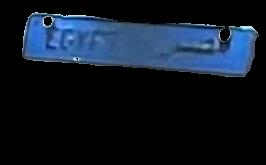

In [ ]:
# Load the image
img = cv2.imread('/content/EALPR/EALPR- Plates dataset/0061_license_plate_1.png')

# Convert the image to the HSV color space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define the range for blue color in HSV
lower_blue = np.array([90,50,50])
upper_blue = np.array([130,255,255])

# Threshold the image to get only blue color
mask = cv2.inRange(hsv, lower_blue, upper_blue)

# Apply the mask to the original image
result = cv2.bitwise_and(img, img, mask=mask)

# Display the result
cv2_imshow( result)

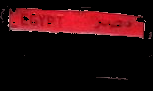

In [ ]:
# Load the image
img = cv2.imread('/content/EALPR/EALPR- Plates dataset/1623_license_plate_1.png')

# Convert the image to the HSV color space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


lower_red = np.array([170, 50, 50])
upper_red = np.array([180, 255, 255])

# Threshold the image to get only blue color
mask = cv2.inRange(hsv, lower_red, upper_red)

# Apply the mask to the original image
result = cv2.bitwise_and(img, img, mask=mask)

# Display the result
cv2_imshow( result)

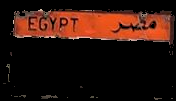

In [ ]:
# Load the image
img = cv2.imread('/content/EALPR/EALPR- Plates dataset/1865_license_plate_1.png')

# Convert the image to the HSV color space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


orange_lower = np.array([0, 50, 50])
orange_upper = np.array([30, 255, 255])

# Threshold the image to get only blue color
mask = cv2.inRange(hsv,orange_lower,orange_upper)

# Apply the mask to the original image
result = cv2.bitwise_and(img, img, mask=mask)

# Display the result
cv2_imshow( result)

In [ ]:
def predict(path):
  img = cv2.imread(path)
  # Convert the image to the desired color space
  hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

  # Define the selected colors and their corresponding lower and upper thresholds
  colors = {
    'red': ([170, 50, 50], [180, 255, 255]),
    'blue': ([90,50,50], [130,255,255]),
    'orange':([0, 50, 50],[30, 255, 255])
    }
  # Initialize a dictionary to store the computed areas
  areas = {}

  # Loop over each selected color and compute its area
  for color, (lower, upper) in colors.items():
      # Create a mask for the color
      mask = cv2.inRange(hsv, np.array(lower), np.array(upper))

      # Apply the mask to the original image
      masked_img = cv2.bitwise_and(img, img, mask=mask)
      #cv2_imshow( masked_img)
      # Convert the masked image to grayscale
      gray = cv2.cvtColor(masked_img, cv2.COLOR_BGR2GRAY)

      # Threshold the grayscale image to get a binary image
      _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)

      # Compute the area of the binary image
      area = cv2.countNonZero(binary)

      # Store the area in the dictionary
      areas[color] = area

  # Find the color with the largest area
  largest_area_color = max(areas, key=areas.get)

  # Print the color with the largest area
  return largest_area_color

In [ ]:
predict('/content/EALPR/EALPR- Plates dataset/1865_license_plate_1.png')

'orange'

In [ ]:
trb=0
for path in os.listdir('/content/plates/plates-classification/plate colors/blue')[:100]:
  image='/content/plates/plates-classification/plate colors/blue/'+str(path)
  if predict(image)=='blue':
    trb+=1
print(f" True blue = {trb}")
trr=0
for path in os.listdir('/content/plates/plates-classification/plate colors/red'):
  image='/content/plates/plates-classification/plate colors/red/'+str(path)
  if predict(image)=='red':
    trr+=1
print(f" True red = {trr}")
tro=0
for path in os.listdir('/content/plates/plates-classification/plate colors/orange'):
  image='/content/plates/plates-classification/plate colors/orange/'+str(path)
  if predict(image)=='orange':
    tro+=1
print(f" True orange = {tro}")

 True blue = 80
 True red = 14
 True orange = 9


In [ ]:
len(os.listdir('/content/plates/plates-classification/plate colors/red'))

26

In [ ]:
len(os.listdir('/content/plates/plates-classification/plate colors/orange'))

9

In [ ]:
acc=(trb+trr+tro)/(100+26+9)
print(f"Accuracy = {round(acc,2)} ")

Accuracy = 0.76 


# **Contours according to the black lines in the image/select above the characters**

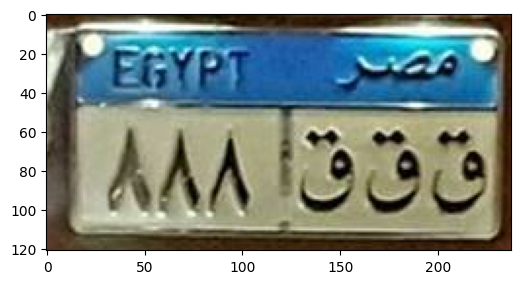

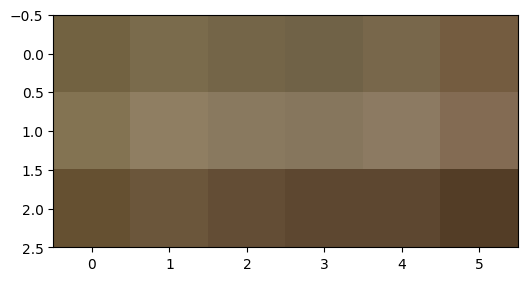

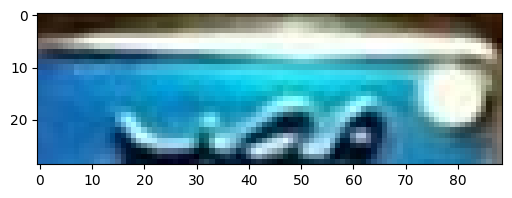

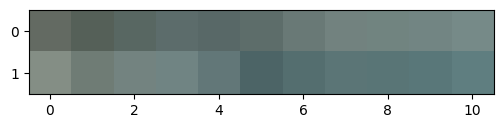

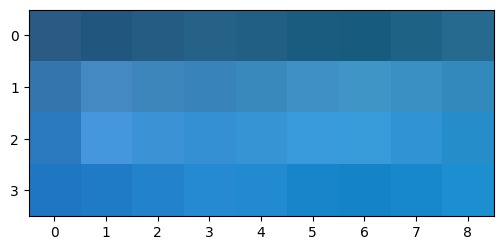

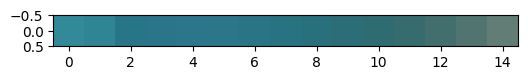

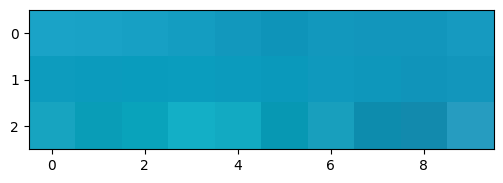

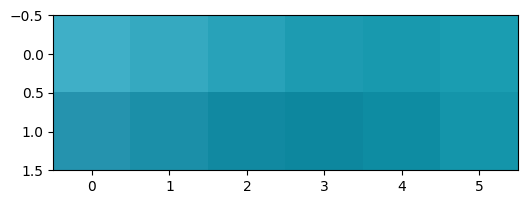

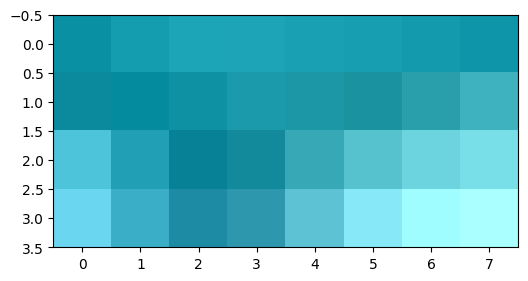

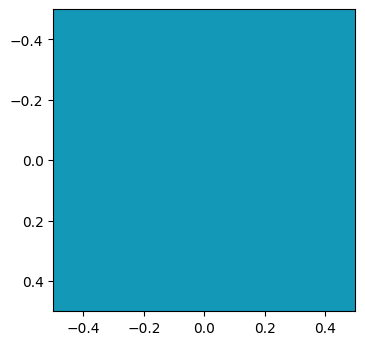

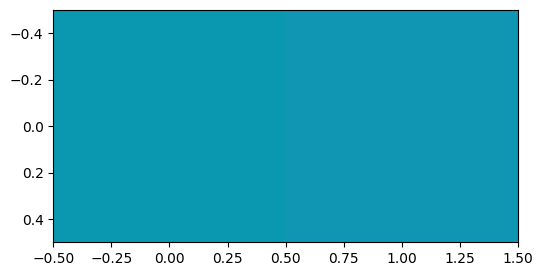

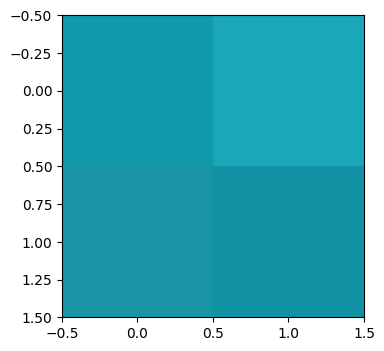

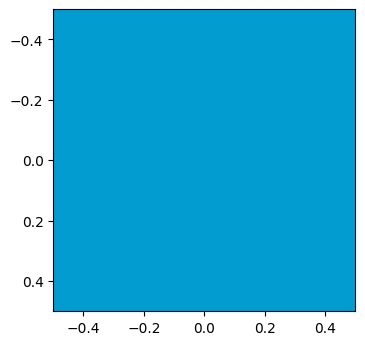

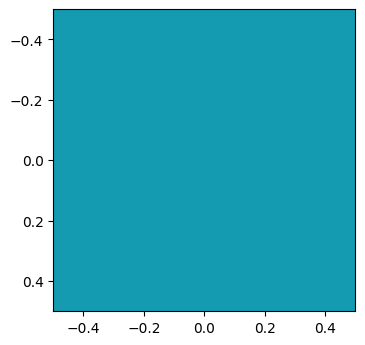

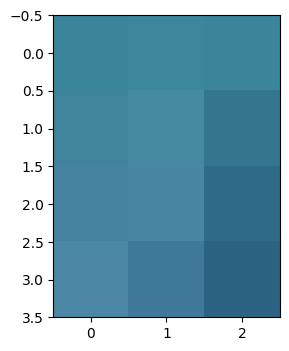

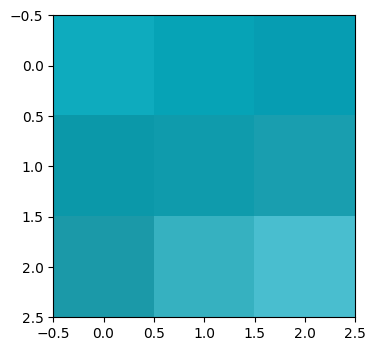

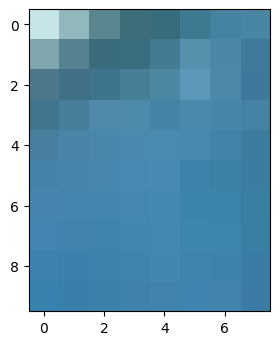

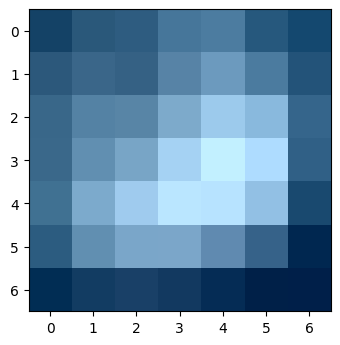

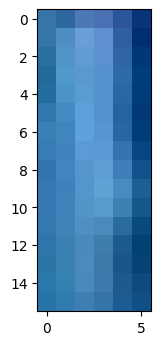

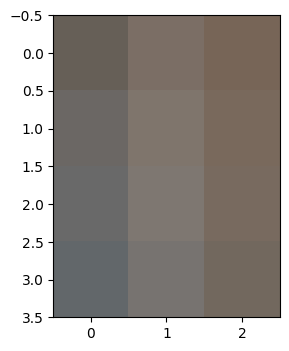

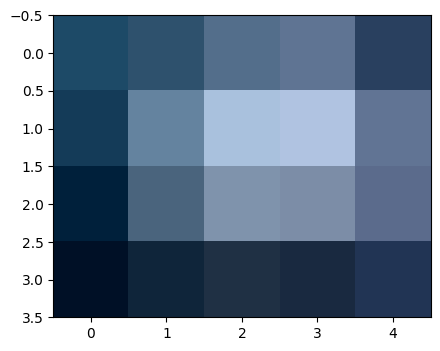

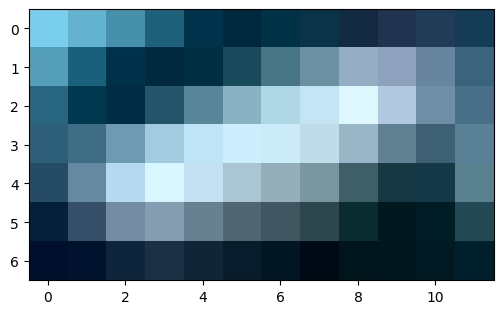

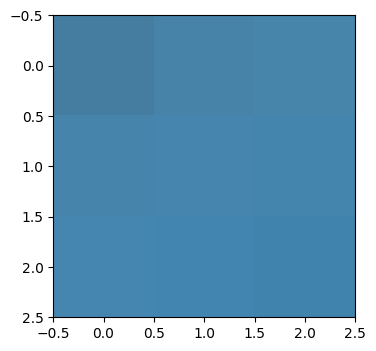

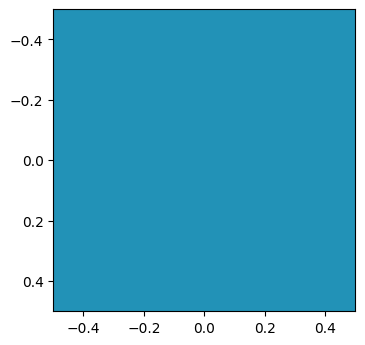

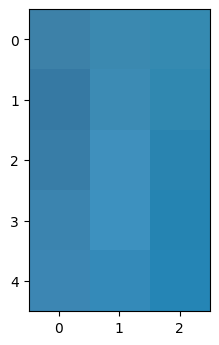

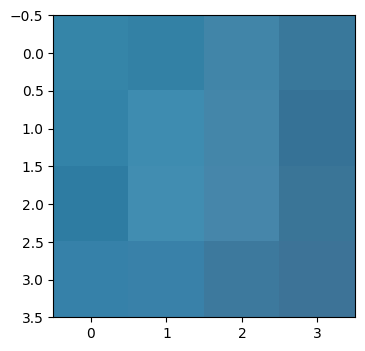

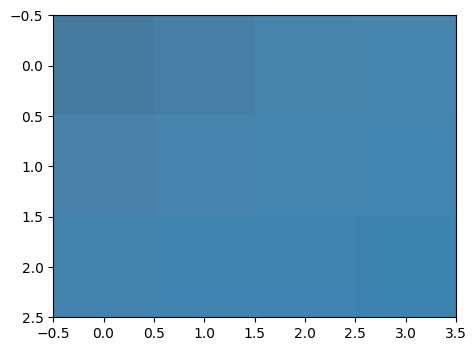

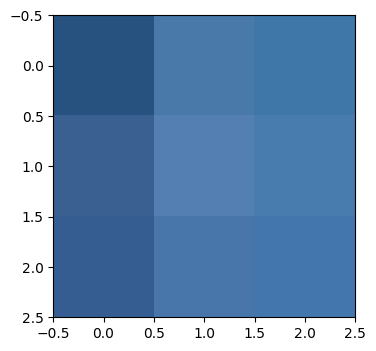

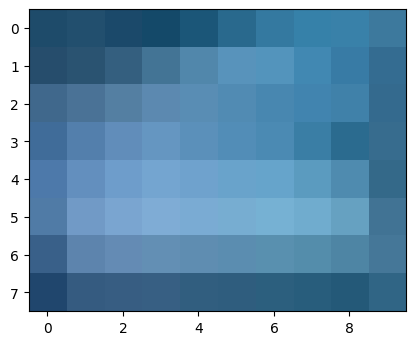

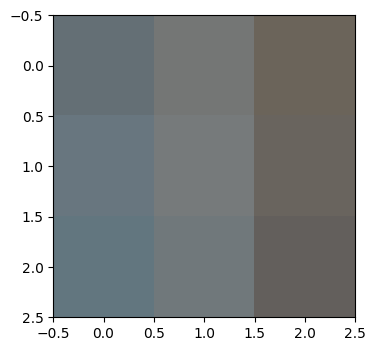

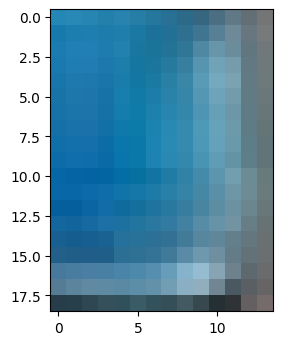

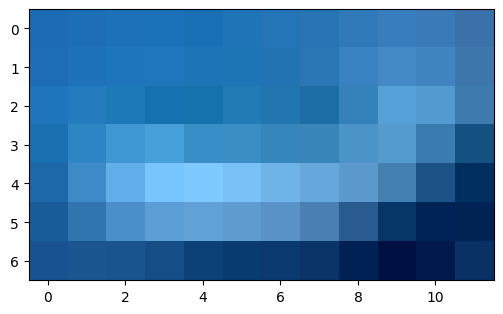

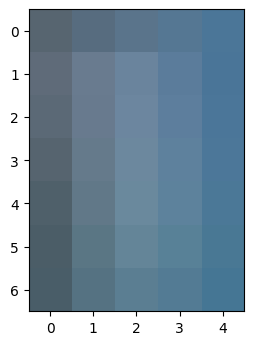

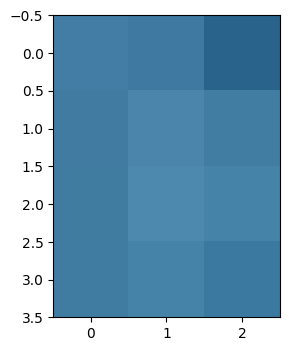

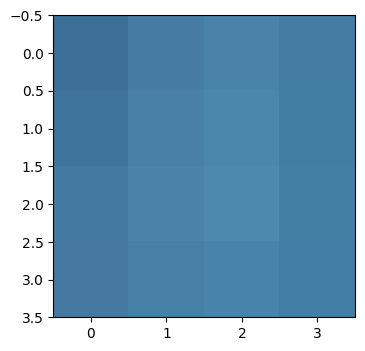

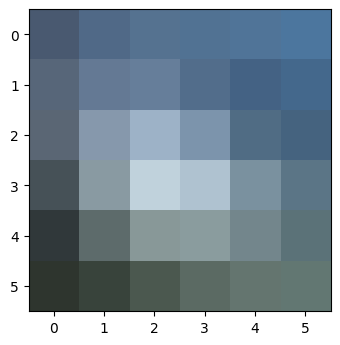

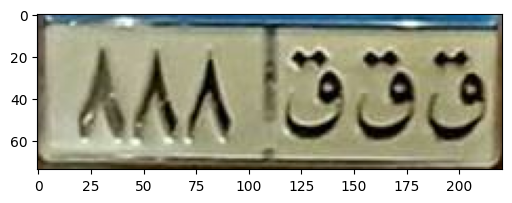

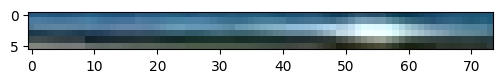

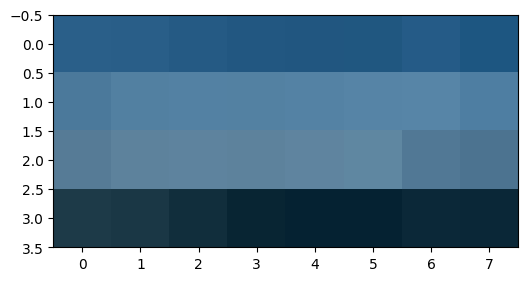

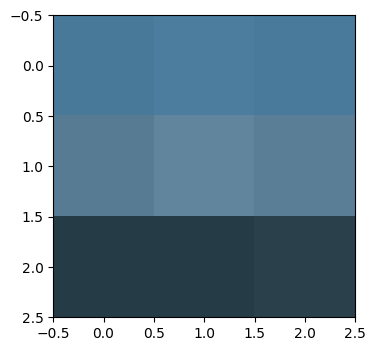

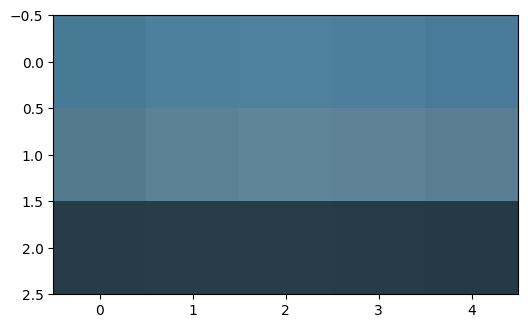

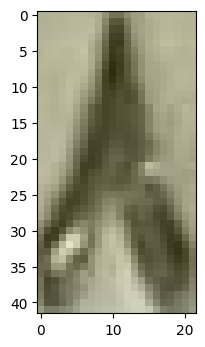

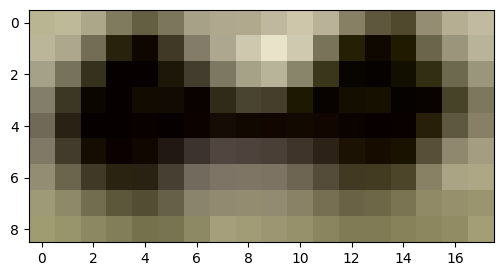

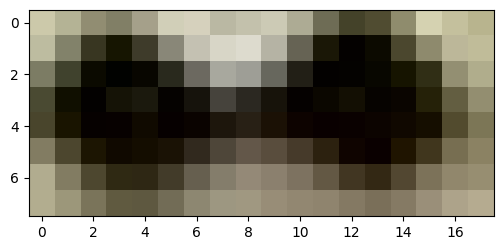

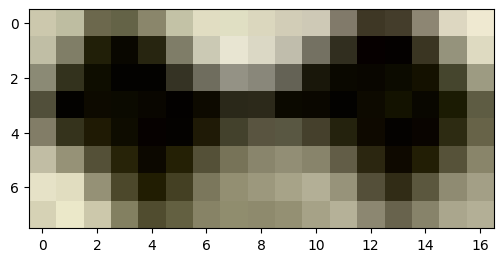

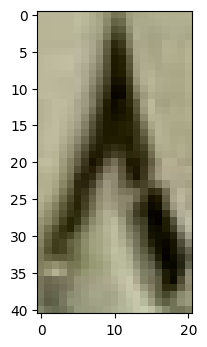

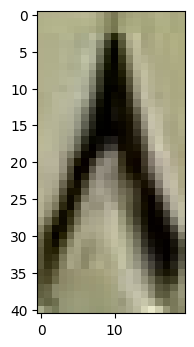

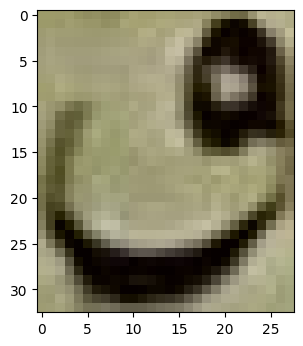

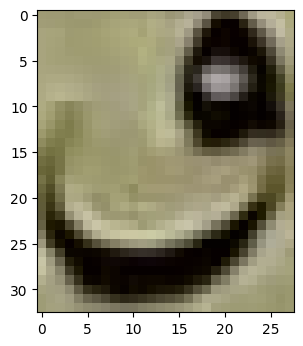

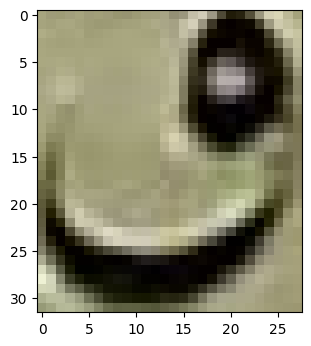

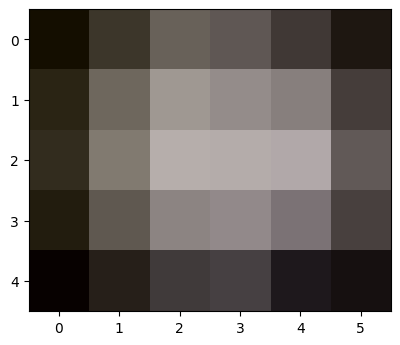

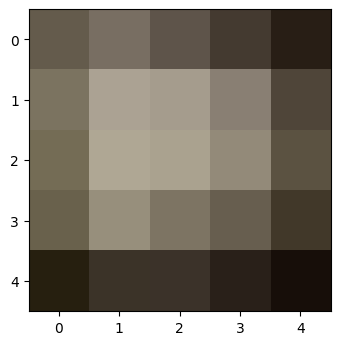

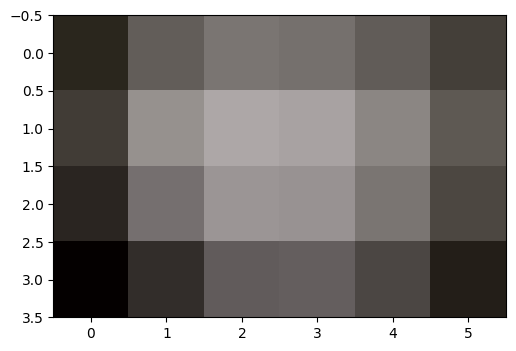

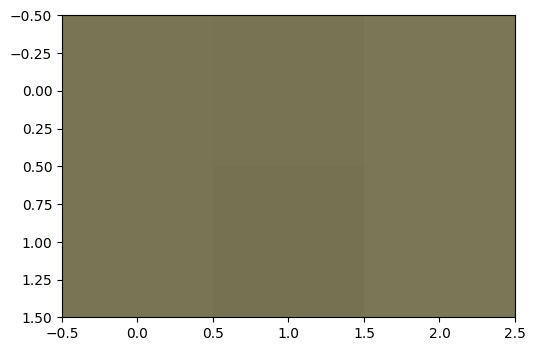

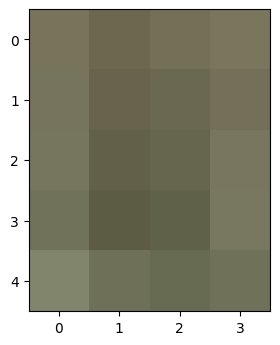

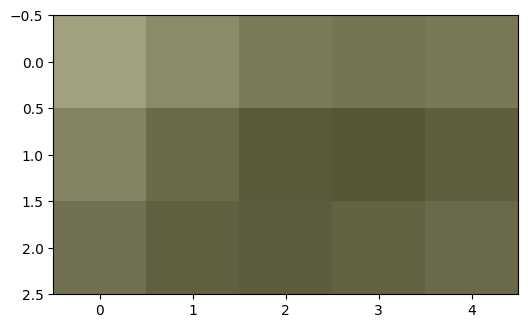

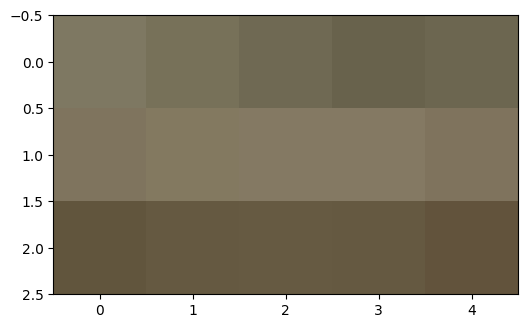

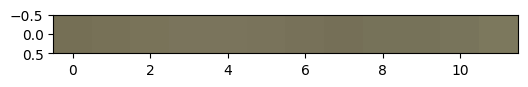

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load the image
img = cv2.imread('/content/EALPR/EALPR- Plates dataset/0854_license_plate_1.png')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Apply a threshold to the image to separate the black lines from the rest of the image
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Find contours in the thresholded image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Sort the contours by their y-coordinate
sorted_contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[1])
for x in sorted_contours:
  # Find the bounding box of the black line of interest
  top_rect = cv2.boundingRect(x)
  # Crop the image to the top part
  top_img = img[top_rect[1]:top_rect[1]+top_rect[3], top_rect[0]:top_rect[0]+top_rect[2]]

  plt.figure(dpi=100)
  plt.imshow(top_img)
  plt.show()


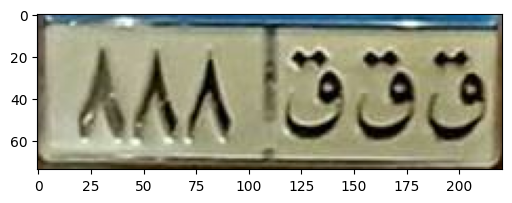

Mean color of top part: (50.97415966386555, 106.49453781512605, 147.0107142857143, 0.0)


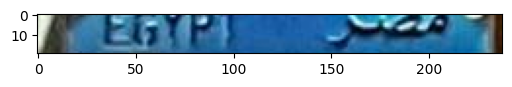

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract

# Load the image
img = cv2.imread('/content/EALPR/EALPR- Plates dataset/0854_license_plate_1.png')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Apply thresholding to create a binary image
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Find contours in the binary image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Sort the contours by y-coordinate to process from top to bottom
sorted_contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[1])

# Keep track of the largest text string and its corresponding bounding rectangle
max_text = ""
max_rect = None
best=0
for contour in sorted_contours:
    x, y, w, h = cv2.boundingRect(contour)
    top_img = img[y:y+h, x:x+w]
    # Apply OCR to the selected region
    text = pytesseract.image_to_string(top_img, config="--psm 10")
    # Check if the extracted text contains any non-space characters
    if any(c != ' ' for c in text):
        # Update the largest text string and its corresponding bounding rectangle if applicable
        if len(text.strip()) > len(max_text):
            best=contour
            max_text = text.strip()
            max_rect = (x, y, w, h)

top_rect = cv2.boundingRect(best)
top_img = img[top_rect[1]:top_rect[1]+top_rect[3], top_rect[0]:top_rect[0]+top_rect[2]]

# Display the result
plt.figure(dpi=100)
plt.imshow(top_img)
plt.show()
# Take the part above the cropped region
top_img = img[top_rect[1]-20:top_rect[1], 0:img.shape[1]]

# Get the color of the top part
mean_color = cv2.mean(top_img)

# Draw the bounding rectangle around the selected region
#if max_rect is not None:
#   cv2.rectangle(img, (max_rect[0], max_rect[1]), (max_rect[0]+max_rect[2], max_rect[1]+max_rect[3]), (0, 255, 0), 2)

# Print the largest text string
#print(f"Largest text string: {max_text}")


# Print the mean color of the top part
print(f"Mean color of top part: {mean_color}")
# Display the result
plt.figure(dpi=100)
plt.imshow(top_img)
plt.show()

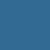

In [ ]:
from google.colab.patches import cv2_imshow
color =(mean_color[2], mean_color[1], mean_color[0])
# Create a small image of size (50, 50) with the desired color
color_image = np.zeros((50, 50, 3), np.uint8)
color_image[:] = color

# Display the image with the color
cv2_imshow(color_image)

In [ ]:
def make_prediction(path):
  # Load the image
  img = cv2.imread(path)

  # Convert the image to grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  # Apply thresholding to create a binary image
  ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

  # Find contours in the binary image
  contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

  # Sort the contours by y-coordinate to process from top to bottom
  sorted_contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[1])

  # Keep track of the largest text string and its corresponding bounding rectangle
  max_text = ""
  max_rect = None
  best=0
  for contour in sorted_contours:
      x, y, w, h = cv2.boundingRect(contour)
      top_img = img[y:y+h, x:x+w]
      # Apply OCR to the selected region
      text = pytesseract.image_to_string(top_img, config="--psm 10")
      # Check if the extracted text contains any non-space characters
      if any(c != ' ' for c in text):
          # Update the largest text string and its corresponding bounding rectangle if applicable
          if len(text.strip()) > len(max_text):
              best=contour
              max_text = text.strip()
              max_rect = (x, y, w, h)

  top_rect = cv2.boundingRect(best)
  top_img = img[top_rect[1]:top_rect[1]+top_rect[3], top_rect[0]:top_rect[0]+top_rect[2]]

  # Display the result
  #plt.figure(dpi=100)
  #plt.imshow(top_img)
  #plt.show()
  # Take the part above the cropped region
  top_img = img[top_rect[1]-5:top_rect[1], 0:img.shape[1]]

  # Get the color of the top part
  mean_color = cv2.mean(top_img)

  # Draw the bounding rectangle around the selected region
  #if max_rect is not None:
  #   cv2.rectangle(img, (max_rect[0], max_rect[1]), (max_rect[0]+max_rect[2], max_rect[1]+max_rect[3]), (0, 255, 0), 2)

  # Print the largest text string
  #print(f"Largest text string: {max_text}")


  # Print the mean color of the top part
  #print(f"Mean color of top part: {mean_color}")
  # Display the result
  #plt.figure(dpi=100)
  #plt.imshow(top_img)
  #plt.show()
  return (mean_color[2],mean_color[1],mean_color[0])

In [ ]:
make_prediction('/content/EALPR/EALPR- Plates dataset/0854_license_plate_1.png')

(148.31932773109244, 103.31932773109244, 42.7)

In [ ]:
trb=0
for path in os.listdir('/content/plates/plates-classification/plate colors/blue')[:100]:
  image='/content/plates/plates-classification/plate colors/blue/'+str(path)
  color=make_prediction(image)
  if in_range(color,blue2) or in_range(color,blue):
    trb+=1
print(trb)

34


# **Using Model to detect characters area and take the part above them**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip --quiet install onnx onnxruntime onnxsim
!pip install onnx-tf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 82.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 91.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 69.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.7/238.7 KB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 KB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 73.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 12.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
tensorflow 2.11.0 requires protobuf<3.20,>=3.9

In [ ]:
import cv2
import time
import requests
import random
import numpy as np
import onnxruntime as ort
from PIL import Image
from pathlib import Path
from collections import OrderedDict,namedtuple
import matplotlib.pyplot as plt
from numpy.lib.type_check import imag
cuda = False
plate_shape=(704,704)
char_shape=(288,288)

In [ ]:
def letterbox(im, new_shape, color=(114, 114, 114), auto=True, scaleup=True, stride=32):
    # Resize and pad image while meeting stride-multiple constraints
    shape = im.shape[:2]  # current shape [height, width]
    if isinstance(new_shape, int):
        new_shape = (new_shape, new_shape)

    # Scale ratio (new / old)
    r = min(new_shape[0] / shape[0], new_shape[1] / shape[1])
    if not scaleup:  # only scale down, do not scale up (for better val mAP)
        r = min(r, 1.0)

    # Compute padding
    new_unpad = int(round(shape[1] * r)), int(round(shape[0] * r))
    dw, dh = new_shape[1] - new_unpad[0], new_shape[0] - new_unpad[1]  # wh padding

    if auto:  # minimum rectangle
        dw, dh = np.mod(dw, stride), np.mod(dh, stride)  # wh padding

    dw /= 2  # divide padding into 2 sides
    dh /= 2

    if shape[::-1] != new_unpad:  # resize
        im = cv2.resize(im, new_unpad, interpolation=cv2.INTER_LINEAR)
    top, bottom = int(round(dh - 0.1)), int(round(dh + 0.1))
    left, right = int(round(dw - 0.1)), int(round(dw + 0.1))
    im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)  # add border
    return im, r, (dw, dh)

In [ ]:
def init(img,classes,model,shape):
  providers = ['CUDAExecutionProvider', 'CPUExecutionProvider'] if cuda else ['CPUExecutionProvider']
  session = ort.InferenceSession(model, providers=providers)
  im,r,(dw,dh)=letterbox(img,shape,auto=False)    # ex shape -> (704,704)
  #Name of the classes according to class indices.
  names = classes
  #Creating random colors for bounding box visualization.
  colors = {name:[int(random.randint(0, 255) * 0.2) for _ in range(3)] for i,name in enumerate(names)}
  return providers,session,im,r,(dw,dh),names,colors

In [ ]:
def sortFn(li):
  return li[0]


In [ ]:
def getCharacters(img):
  classes=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20',
         '21','22','23','24','25','26']
  model= "/content/gdrive/MyDrive/bestLetters.onnx"
  #img = cv2.imread(image_path)
  providers,session,im,r,(dw,dh),names,colors=init(img,classes,model,char_shape)
  mg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  #Preprocessing the image for prediction.
  image = img.copy()
  image, ratio, dwdh = letterbox(image,char_shape, auto=False)
  image = image.transpose((2, 0, 1))
  image = np.expand_dims(image, 0)
  image = np.ascontiguousarray(image)

  im = image.astype(np.float32)
  im /= 255
  im.shape

  #Getting onnx graph input and output names.
  outname = [i.name for i in session.get_outputs()]
  inname = [i.name for i in session.get_inputs()]
  inp = {inname[0]:im}

  # Running inference using session.
  outputs = session.run(outname, inp)[0]

  ori_images = [img.copy()]

  labels=['أ','ب','ج','د','ر','س','ص','ط','ع','ف','ق','ل','م','ن','ھ','و','ى','٠','١','٢','٣','٤', '٥', '٦', '٧', '٨','٩']
  dict_label={}
  for char in labels:
    dict_label[labels.index(char)]=char

  number=[]
  #Visualizing bounding box prediction.
  for i,(batch_id,x0,y0,x1,y1,cls_id,score) in enumerate(outputs):
      image = ori_images[int(batch_id)]
      box = np.array([x0,y0,x1,y1])
      box -= np.array(dwdh*2)
      box /= ratio
      box = box.round().astype(np.int32).tolist()
      box_coordinates=box.copy()
      cls_id = int(cls_id)
      score = round(float(score),3)
      name = names[cls_id]
      li=box.copy()
      li.append(dict_label[int(name)])
      number.append(li)
      #color = colors[name]
      #name += ' '+str(score)
      #cv2.rectangle(image,box[:2],box[2:],color,2)
      #cv2.putText(image,name,(box[0], box[1] - 2),cv2.FONT_HERSHEY_SIMPLEX,0.75,color,thickness=2)

  #plt.figure(dpi=150)
  #plt.imshow(ori_images[0])
  number.sort(key=sortFn)
  return  number

In [ ]:
plate_number=getCharacters(cv2.imread('/content/EALPR/EALPR- Plates dataset/0191_license_plate_1.png'))
plate_number

[[23, 38, 31, 65, '١'],
 [38, 39, 46, 66, '١'],
 [53, 39, 61, 66, '١'],
 [79, 46, 92, 63, 'د'],
 [98, 46, 111, 64, 'د'],
 [117, 48, 130, 65, 'د']]

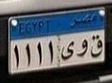

In [ ]:
# Define a function to get the bounding box for a list of character bounding boxes
def get_plate_bbox(char_bboxes):
    # Get the minimum and maximum x and y coordinates for all bounding boxes
    min_x = min(bbox[0] for bbox in char_bboxes)
    min_y = min(bbox[1] for bbox in char_bboxes)
    max_x = max(bbox[2] for bbox in char_bboxes)
    max_y = max(bbox[3] for bbox in char_bboxes)

    # Return the bounding box that contains all characters
    return [min_x, min_y, max_x, max_y]

# Example list of character bounding boxes
char_bboxes =[]
for x in plate_number:
  char_bboxes.append(x[:4])
# Get the bounding box that contains all characters
plate_bbox = get_plate_bbox(char_bboxes)

# Example image
img = cv2.imread('/content/EALPR/EALPR- Plates dataset/0041_license_plate_1.png')
cv2_imshow(img)
print("\n\n")
# Crop the image using the plate bounding box
x,y,w,h=plate_bbox[0],plate_bbox[1],plate_bbox[2]-plate_bbox[0],plate_bbox[3]-plate_bbox[1]
plate_img = img[y:y+h, x:x+w]

# Display the result
cv2_imshow(plate_img)

In [ ]:
color_above_char = img[max(0,y-20):y-5, x:w]
cv2_imshow(color_above_char)

mean_color = cv2.mean(color_above_char)
mean_color[:3]

(120.67777777777778, 72.85714285714286, 28.687301587301587)

In [ ]:
# Define a function to get the bounding box for a list of character bounding boxes
def get_plate_bbox(char_bboxes):
    # Get the minimum and maximum x and y coordinates for all bounding boxes
    min_x = min(bbox[0] for bbox in char_bboxes)
    min_y = min(bbox[1] for bbox in char_bboxes)
    max_x = max(bbox[2] for bbox in char_bboxes)
    max_y = max(bbox[3] for bbox in char_bboxes)

    # Return the bounding box that contains all characters
    return [min_x, min_y, max_x, max_y]

def predict_model(path):
  plate_number=getCharacters(cv2.imread(path))
  char_bboxes =[]
  for x in plate_number:
    char_bboxes.append(x[:4])
  # Get the bounding box that contains all characters
  plate_bbox = get_plate_bbox(char_bboxes)

  # Example image
  #img = cv2.imread(path)
  #cv2_imshow(img)
  #print("\n\n")
  # Crop the image using the plate bounding box
  x,y,w,h=plate_bbox[0],plate_bbox[1],plate_bbox[2]-plate_bbox[0],plate_bbox[3]-plate_bbox[1]
  plate_img = img[y:y+h, x:x+w]
  above_char = img[max(0,y-20):y, x:w]
  #cv2_imshow(above_char)
  mean_color = cv2.mean(above_char)
  return mean_color[:3]
  # Display the result
  #cv2_imshow(plate_img)

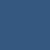

In [ ]:
mean_color=predict_model('/content/EALPR/EALPR- Plates dataset/0191_license_plate_1.png')
color =(mean_color[0], mean_color[1], mean_color[2])
color_image = np.zeros((50, 50, 3), np.uint8)
color_image[:] = color

# Display the image with the color
cv2_imshow(color_image)

In [ ]:
trb=0
for path in os.listdir('/content/plates/plates-classification/plate colors/blue')[:100]:
  image='/content/plates/plates-classification/plate colors/blue/'+str(path)
  color=predict_model(image)
  if in_range(color,blue2) or in_range(color,blue):
    trb+=1
print(trb)

95
